<a href="https://colab.research.google.com/github/HannahMwende/Driver-Drowniness-dectection-system/blob/main/driver_drowniness.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Driver drowniness detection system
#### Authors
* Ann Maureen
* Hannah Mutua
* Ibrahim Hafiz
* Samuel Kabati
* Angela Cheruto
* Janet Gachoki



## Business understanding

### Introduction
Drowsy Driving is the act of driving while feeling fatigued or sleepy. There are various factors that can contribute to drowsy driving. Sleep depletion, sleep disorders, medication, stress, drunk driving, or extended hours for shift work are some of the factors. Drowsy driving can have a number of effects on the driver such as poor judgment, loss of attention, and delayed reaction times.<br>

A report by the National Security Council (NSC) shows that in the United States, drowsy driving accounts for about 100,000 crashes, 71000 injuries, and 1550 fatalities annually. Another report by American Automobile Association (AAA) shows that 9.5% of car crashes are caused by drowsy driving and 27% of drivers admit that they have a difficult time keeping their eyes open while driving if they are tired.<br>

In Kenya, a report by the  National Transport and Safety Authority shows that the number of people killed and injured in road crashes went up by 17.5% in September 2021 as compared to the same period in 2020. Falling asleep at the wheel is one of the major causes of these accidents. Research has indicated that going more than 20 hours without sleep is the equivalent of having a blood-alcohol concentration of 0.08%.


### Problem statement
Dereva car brand company is looking to manufacture innovative and outstanding quality vehicles with a special emphasis on the safety features of their cars in order to reduce the rising number of accidents resulting from drowsy drivers.<br>
Our project will major in curbing the high rate of accidents by developing a  driver drowsiness detection system built on a neural network that can determine if eyes are open or closed and, when used in conjunction with computer vision, can determine whether a living human has had their eyes closed for longer than three seconds 
 


### Main objective
To develop a neural network that can detect if eyes are open or closed.


### Specific Objectives
* Determine the region of interest which is the eye region
* Deploy our model to a webcam application that will classify a driver as having slept on the wheel if the positive class(eyes closed) is true for more than three frames.

### Metric of success
Our model will be considered successful if an AUC score of 0.97 will be attained .

### Understanding the problem context
For drowsiness detection, our goal is to correctly detect whether one has their eyes open or closed. If the eyes remain closed for more than three seconds the driver should receive an alert to wake them up.According to the following [article](<https://www.webmd.com/sleep-disorders/what-to-know-microsleep>) by WebMD if you doze off for 3 seconds while at a speed of 27 metres per second you can travel 92 metres in the wrong direction. 
Using the Area Under the curve (AUC) as our metric we are looking at the probability that our model will rank a true positive higher than a false positive.
With an AUC score of 0.97, our model is able to correctly separate the open eyes and the closed eyes 97 times out of 100.  

### Defining Experimental design
* Import the relevant libraries used in the analysis.

* Load and preview images

* Explore the dataset we will use for our project.

* Exploratory Data Analysis (EDA)

* Data Pre-processing

* Modelling and Evaluation

* Challenging the model

* Conclusion

* Recommendations

## Data understanding
The data is from [Kaggle](<https://www.kaggle.com/datasets/prasadvpatil/mrl-dataset>) it was created with the help of a larger-scale dataset of human eyes from Media Research Lab.

The dataset contains images of the eye state whether open or closed. Of the 4000 images, 2000 are open eyes, and 2000 are closed eyes some with glasses some without. The images have a bit depth of 8. The dataset contains images with high and low resolution since they were captured by different devices under different lighting conditions.

### Loading dataset

In [36]:
#Importing libraries
import cv2
import os
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import confusion_matrix
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from PIL import Image as im
import seaborn as sns
import tensorflow as tf
tf.random.set_seed(2)


In [3]:
#Connecting colab to gooogle drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Loading data using os.listdir 

In [4]:
 #Printing contents of train folder
print(os.listdir("/content/drive/Shareddrives/Elite Drive/train"))

['Open_Eyes', 'Closed_Eyes']


In [5]:
#Loading images and converting to array
def load_images_from_folder(folder,eyes):
    images=[]
    for filename in os.listdir(folder):
        img=cv2.imread(os.path.join(folder,filename))
        img=cv2.resize(img,(80,80))
        images.append([img,eyes])
    return images


In [6]:
#Loading images from folders

folder="/content/drive/Shareddrives/Elite Drive/train/Open_Eyes"
open_eyes=load_images_from_folder(folder,0)

folder="/content/drive/Shareddrives/Elite Drive/train/Closed_Eyes"
closed_eyes=load_images_from_folder(folder,1)

##Previewing data

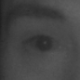

In [7]:
#Displaying an image from open eyes
data=im.fromarray(open_eyes[0][0])
data

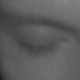

In [8]:
#Dispaying an image from closed eyes
data=im.fromarray(closed_eyes[119][0])
data

##Data Exploration
For better understanding of our data we will plot our visuals

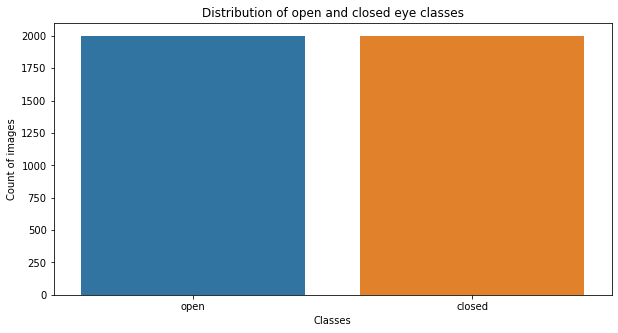

In [9]:
#Visualization of open and closed eyes
open=len(open_eyes)
closed=len(closed_eyes)
data={
    'open':open,
    'closed':closed,
}
classes=list(data.keys())
values=list(data.values())
plt.figure(figsize=(10,5))
sns.barplot(x=classes,y=values)
plt.xlabel("Classes")
plt.ylabel("Count of images")
plt.title('Distribution of open and closed eye classes')
plt.show()

In [10]:
print("The total number of images of the Opened eyes:", len(open_eyes))
print("The total number of images of the Closed eyes:", len(closed_eyes))


The total number of images of the Opened eyes: 2000
The total number of images of the Closed eyes: 2000


##Data Pre-processing

In [11]:
#Combining the dataset
eyes=open_eyes+closed_eyes


In [12]:
#Setting up images with X being images and y being labels
X=[]
y=[]

for features, label in eyes:
    X.append(features)
    y.append(label)

In [13]:
#Converting image to array for modelling and scaling by dividing by 255
X=np.array(X).reshape(-1,80,80,3)
y=np.array(y)
X=X/255.0

In [14]:
# Splitting the data 

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=23 )

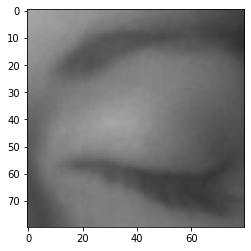

In [15]:
plt.figure()
plt.imshow(X_train[10])
plt.show()

In [16]:
#class names for images shown below 

class_names=['open','close']

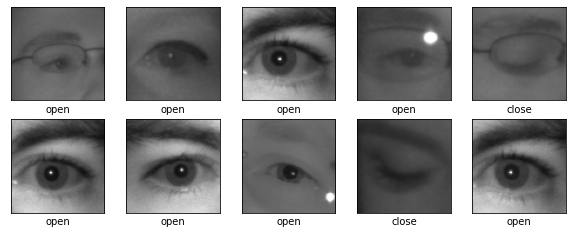

In [17]:
#producing images of training set with corresponding label
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]],)

##Data modeling

In [18]:
#creating a function that returns a Keras model

def deep_learning_model(dense_neurons1=128,dense_neurons2=128,dense_neurons3=128,layout='',filters=32,dropout=None,pooling=None):
  model=Sequential()
  if layout== '5x5':
    model.add(Conv2D(filters=filters, kernel_size=(5,5),activation='relu',input_shape=(80,80,3)))

  if layout=='3x3'or layout== '2*3x3':
    model.add(Conv2D(filters=filters,kernel_size=(3,3),activation='relu',input_shape=(80,80,3)))

#adding pooling for convlutional layers
  if pooling!=None:
    model.add(MaxPooling2D(pool_size=(2,2)))

  if layout=='2*3x3':
    #second layer
      model.add(Conv2D(filters=filters,kernel_size=(3,3),activation='relu',input_shape=(80,80,3)))
#adding pooling on 2*3x3
  if pooling !=None and layout =='2*3x3':
    model.add(MaxPooling2D(pool_size=(2,2)))

#flatten model for dense layers
  model.add(Flatten())
  model.add(Dense(dense_neurons1,activation='relu'))
  if dropout!=None:
    model.add(Dropout(dropout))
  model.add(Dense(dense_neurons2,activation='relu'))
  if dropout!=None:
    model.add(Dropout(dropout))
  model.add(Dense(dense_neurons3,activation='relu'))
  if dropout!=None:
    model.add(Dropout(dropout))

#adding output layer

  model.add(Dense(1,activation='sigmoid'))

  #compiling using binary cross entropy and using AUC as metric 
  model.compile(loss='binary_crossentropy', optimizer='adam',
                metrics=[tf.keras.metrics.AUC(curve='PR')])

  return model


In [19]:
params_deep={
    "layout":['3x3','5x5','2*3x3'],
    "dense_neurons1":[64,128],
    'filters':[8,18,32],
    "dropout":[0.1,0.5,],
    "pooling":[None,1],
    "epochs":[10]}


In [20]:
nn_deep=KerasClassifier(build_fn=deep_learning_model, batch_size=200)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  """Entry point for launching an IPython kernel.


In [21]:
gs_deep=GridSearchCV(estimator=nn_deep,param_grid=params_deep,cv=3,scoring='average_precision')

In [22]:
early_stop=tf.keras.callbacks.EarlyStopping(patience=5, min_delta=.05)

In [23]:
gs_deep.fit(X_train, y_train,validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/10
10/10 [==============================] - 13s 73ms/step - loss: 0.9149 - auc: 0.6121 - val_loss: 0.5068 - val_auc: 0.9530
Epoch 2/10
10/10 [==============================] - 0s 28ms/step - loss: 0.5167 - auc: 0.8212 - val_loss: 0.3564 - val_auc: 0.9708
Epoch 3/10
10/10 [==============================] - 0s 27ms/step - loss: 0.3442 - auc: 0.9342 - val_loss: 0.2430 - val_auc: 0.9793
Epoch 4/10
10/10 [==============================] - 0s 28ms/step - loss: 0.2643 - auc: 0.9545 - val_loss: 0.2701 - val_auc: 0.9831
Epoch 5/10
10/10 [==============================] - 0s 28ms/step - loss: 0.2161 - auc: 0.9681 - val_loss: 0.1257 - val_auc: 0.9878
Epoch 6/10
10/10 [==============================] - 0s 28ms/step - loss: 0.1601 - auc: 0.9798 - val_loss: 0.1089 - val_auc: 0.9902
Epoch 7/10
10/10 [==============================] - 0s 28ms/step - loss: 0.1488 - auc: 0.9831 - val_loss: 0.0868 - val_auc: 0.9916
Epoch 8/10
10/10 [==============================] - 0s 28ms/step - loss: 0.1197 - 

GridSearchCV(cv=3,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7f0a1acf8a50>,
             param_grid={'dense_neurons1': [64, 128], 'dropout': [0.1, 0.5],
                         'epochs': [10], 'filters': [8, 18, 32],
                         'layout': ['3x3', '5x5', '2*3x3'],
                         'pooling': [None, 1]},
             scoring='average_precision')

In [24]:
print(f'Best Accuracy for {gs_deep.best_score_} using {gs_deep.best_params_}')

Best Accuracy for 0.99974078673385 using {'dense_neurons1': 64, 'dropout': 0.1, 'epochs': 10, 'filters': 18, 'layout': '2*3x3', 'pooling': None}


The optimal parameters are:
* dense_neurons1: 128
*  dropout: 0.1
*  epochs: 10
* filters: 18
* layout: 2*3x3
* pooling: None

We will perform another grid search with different parameters.

In [26]:
params_deep_two={
    "layout":['2*3x3'],
    "dense_neurons1":[64,128,256],
    "dense_neurons2":[256,512],
    "dense_neurons3":[256,512],
    'filters':[32],
    "dropout":[0,0.1,0.3,0.5,],
    "pooling":[None,1],
    "epochs":[10]

}

In [28]:
gs_deep=GridSearchCV(estimator=nn_deep,param_grid=params_deep_two,cv=3,scoring='average_precision')

In [29]:
gs_deep.fit(X_train, y_train,validation_data=(X_test,y_test),callbacks=[early_stop])

Streaming output truncated to the last 5000 lines.
10/10 [==============================] - 0s 43ms/step - loss: 0.0920 - auc_252: 0.9940 - val_loss: 0.0945 - val_auc_252: 0.9974
Epoch 7/10
10/10 [==============================] - 0s 41ms/step - loss: 0.0626 - auc_252: 0.9974 - val_loss: 0.0391 - val_auc_252: 0.9991
Epoch 8/10
10/10 [==============================] - 0s 41ms/step - loss: 0.0438 - auc_252: 0.9988 - val_loss: 0.0573 - val_auc_252: 0.9988
Epoch 9/10
10/10 [==============================] - 0s 41ms/step - loss: 0.0313 - auc_252: 0.9994 - val_loss: 0.0230 - val_auc_252: 0.9998
Epoch 10/10
10/10 [==============================] - 0s 42ms/step - loss: 0.0249 - auc_252: 0.9994 - val_loss: 0.0362 - val_auc_252: 0.9999
Epoch 1/10
10/10 [==============================] - 2s 110ms/step - loss: 0.8865 - auc_253: 0.5343 - val_loss: 0.6765 - val_auc_253: 0.8531
Epoch 2/10
10/10 [==============================] - 1s 73ms/step - loss: 0.6475 - auc_253: 0.7697 - val_loss: 0.5920 - val_a

GridSearchCV(cv=3,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7f0a1acf8a50>,
             param_grid={'dense_neurons1': [64, 128, 256],
                         'dense_neurons2': [256, 512],
                         'dense_neurons3': [256, 512],
                         'dropout': [0, 0.1, 0.3, 0.5], 'epochs': [10],
                         'filters': [32], 'layout': ['2*3x3'],
                         'pooling': [None, 1]},
             scoring='average_precision')

In [30]:
print(f'Best Accuracy for {gs_deep.best_score_} using {gs_deep.best_params_}')

Best Accuracy for 0.9999167126875831 using {'dense_neurons1': 256, 'dense_neurons2': 512, 'dense_neurons3': 256, 'dropout': 0.3, 'epochs': 10, 'filters': 32, 'layout': '2*3x3', 'pooling': 1}


Implementing the model


In [31]:
model=Sequential()

#adding first convolution layer
model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
#maxpooling after convolution layer
model.add(MaxPooling2D(pool_size=(2,2)))

#adding another convolution layer
model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
#maxpooling after convolution layer
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

#adding first dense layer with 256 nodes
model.add(Dense(256, activation='relu'))
#adding a dropout layer to avoid overfitting
model.add(Dropout(0.3))

#adding second dense layer with 512 nodes
model.add(Dense(512, activation='relu'))
#adding a dropout layer to avoid overfitting
model.add(Dropout(0.3))

#adding third dense layer with 512 nodes
model.add(Dense(256, activation='relu'))
#adding a dropout layer to avoid overfitting
model.add(Dropout(0.3))

#Output layer
model.add(Dense(1, activation='sigmoid'))
#compiling 
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=[tf.keras.metrics.AUC(curve='PR')])

#fitting on train data
model.fit(X_train,y_train,batch_size=200, epochs=10)

Epoch 1/10
15/15 [==============================] - 1s 37ms/step - loss: 0.5944 - auc_506: 0.7296
Epoch 2/10
15/15 [==============================] - 0s 32ms/step - loss: 0.2815 - auc_506: 0.9521
Epoch 3/10
15/15 [==============================] - 0s 31ms/step - loss: 0.1358 - auc_506: 0.9859
Epoch 4/10
15/15 [==============================] - 0s 32ms/step - loss: 0.0662 - auc_506: 0.9970
Epoch 5/10
15/15 [==============================] - 0s 31ms/step - loss: 0.0459 - auc_506: 0.9985
Epoch 6/10
15/15 [==============================] - 0s 31ms/step - loss: 0.0302 - auc_506: 0.9991
Epoch 7/10
15/15 [==============================] - 0s 31ms/step - loss: 0.0133 - auc_506: 0.9999
Epoch 8/10
15/15 [==============================] - 0s 31ms/step - loss: 0.0113 - auc_506: 0.9999
Epoch 9/10
15/15 [==============================] - 0s 32ms/step - loss: 0.0087 - auc_506: 0.9997
Epoch 10/10
15/15 [==============================] - 0s 31ms/step - loss: 0.0072 - auc_506: 0.9998


In [32]:
model.summary()

Model: "sequential_506"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_868 (Conv2D)         (200, 78, 78, 32)         896       
                                                                 
 max_pooling2d_434 (MaxPooli  (200, 39, 39, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_869 (Conv2D)         (200, 37, 37, 32)         9248      
                                                                 
 max_pooling2d_435 (MaxPooli  (200, 18, 18, 32)        0         
 ng2D)                                                           
                                                                 
 flatten_506 (Flatten)       (200, 10368)              0         
                                                                 
 dense_2024 (Dense)          (200, 256)             

In [33]:
score = model.evaluate(X_test, y_test)

32/32 [==============================] - 1s 5ms/step - loss: 0.0168 - auc_506: 1.0000


In [34]:
labels=model.metrics_names

#showing perfomance
print(f'{labels[0]}: {score[0]}')

print(f'{labels[1]}: {score[1]}')

loss: 0.01681014522910118
auc_506: 0.9999542832374573


In [38]:
preds=model.predict(X_test)




In [39]:
confusion_matrix=tf.math.confusion_matrix(labels=y_test,predictions=preds.round()).numpy()

confusion_matrix

array([[505,   5],
       [  0, 490]], dtype=int32)

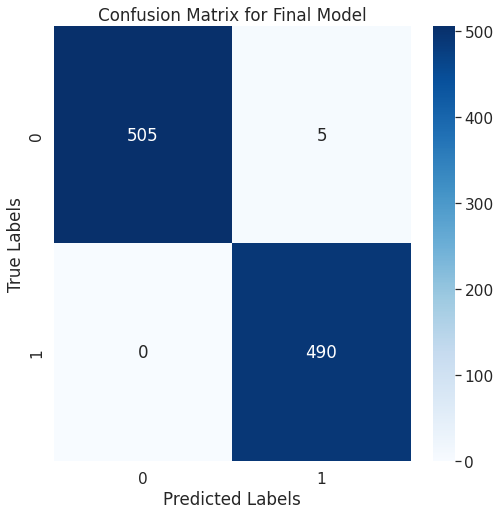

In [47]:
figure =plt.figure(figsize=(8,8))
sns.set(font_scale=1.4)
sns.heatmap(confusion_matrix,cmap=plt.cm.Blues,annot=True,fmt="g")
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.title('Confusion Matrix for Final Model')
plt.show()

In [58]:
tn, fp, fn, tp =confusion_matrix.ravel()
recall = tp/(tp+fn)
precision = tp/(tp+fp)
accuracy = (tp+tn)/(tp+tn+fp+fn)
f1_score = ((precision*recall)/(precision+recall))*2
print(f'Precision score is:',precision)
print(f'Recall score is:',recall)
print(f'Accuracy score is:',accuracy)
print(f'F1 score is:',f1_score)

Precision score is: 0.98989898989899
Recall score is: 1.0
Accuracy score is: 0.995
F1 score is: 0.9949238578680203
